## 验证数据生成
运行data/gen_data.ipynb生成虚拟验证数据

## 训练


为了快速看结果，用的小image

In [7]:
!lr=0.0001 image_size=64 batch_size=512 load_pretrain=../MoCo-v2/models/resnet50_bs32_queue16384_wd0.0001_t0.2_cos/020.pth num_workers=16 epochs=10 python ../train_eval_fund.py

<class '__main__.TrainerDR'>
running_uuid 20230907_051020
<TrainerConfig: {"debug": false, "load_pretrain": "../MoCo-v2/models/resnet50_bs32_queue16384_wd0.0001_t0.2_cos/020.pth", "batch_size": 512, "epochs": 10, "image_size": 64, "lr": 0.0001, "device": "cuda:0", "num_workers": 16, "model": "resnet50"}>
loading  ../MoCo-v2/models/resnet50_bs32_queue16384_wd0.0001_t0.2_cos/020.pth
<All keys matched successfully>
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    initial_lr: 0.0001
    lr: 0.0001
    maximize: False
    weight_decay: 1e-05
)
epoch train mat  0 loss: 0.7224617600440979 type: train matrix epoch: 0 
Test epoch 0 loss: 0.6240888833999634 type: test matrix epoch: 0 
epoch train mat  1 loss: 0.5482132434844971 type: train matrix epoch: 1 
Test epoch 1 loss: 0.43721404671669006 type: test matrix epoch: 1 
epoch train mat  2 loss: 0.3827700912952423 type: train matrix epoch: 2 
Test epoch 2 loss: 0.28027477860450745 type: test matrix epoch: 2

## 测试结果是否符合预期

In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pickle.load(open('./logs/TrainerDR_last/preds_9.pkl', 'rb'))

In [4]:
data

{'loss': tensor([0.0874, 0.1623, 0.1845, 0.1845, 0.1855, 0.1804, 0.1046, 0.1115, 0.1636,
         0.0945, 0.1049, 0.1331, 0.1204, 0.0249, 0.0626, 0.0655, 0.1696, 0.1007,
         0.1248, 0.1211]),
 'pdf': tensor([[       inf, 5.1818e-08, 6.8006e-08,  ..., 9.8822e-09, 9.5486e-09,
          9.3073e-09],
         [       inf, 5.6672e-07, 4.2039e-07,  ..., 5.4264e-07, 5.1648e-07,
          4.9074e-07],
         [       inf, 4.9978e-09, 3.5172e-09,  ..., 2.8714e-03, 2.1716e-03,
          1.6227e-03],
         ...,
         [       inf, 5.2691e-07, 6.4163e-06,  ..., 1.1264e-09, 1.1025e-09,
          1.0793e-09],
         [       inf, 2.6517e-08, 4.6971e-08,  ..., 4.8837e-10, 4.7727e-10,
          4.6641e-10],
         [       inf, 3.6671e-07, 1.7228e-06,  ..., 3.1452e-08, 3.0979e-08,
          3.0510e-08]]),
 'cdf': tensor([[0.0000e+00, 7.1680e-09, 1.0680e-08,  ..., 1.0000e+00, 1.0000e+00,
          1.0000e+00],
         [0.0000e+00, 2.3311e-07, 2.7265e-07,  ..., 1.0000e+00, 1.0000e+00,
    

2.145156


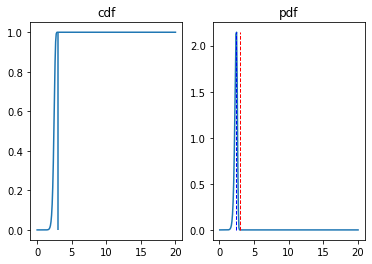

1.2460799


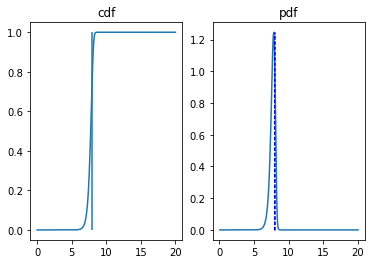

0.23492722


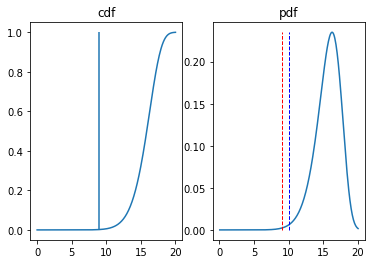

0.16448188


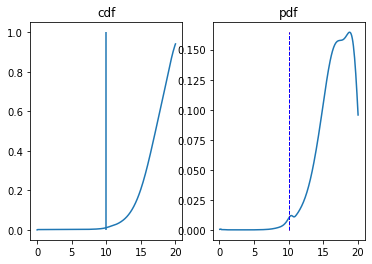

2.0427399


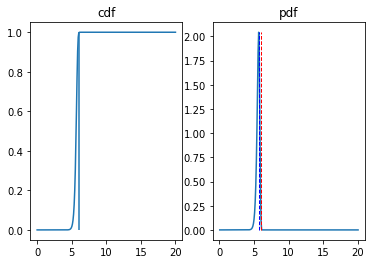

0.23492095


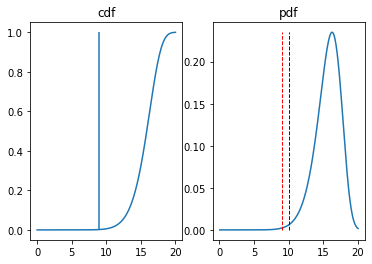

2.0317113


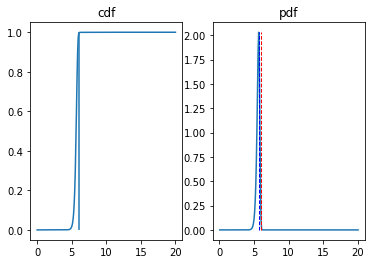

6.7847357


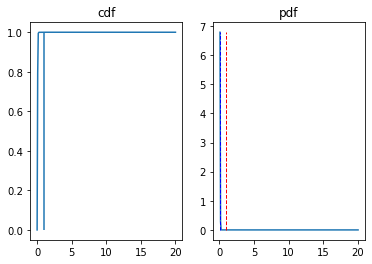

1.2544693


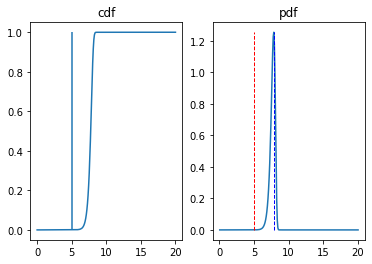

6.7854548


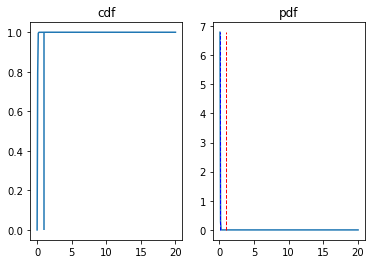

0.23458715


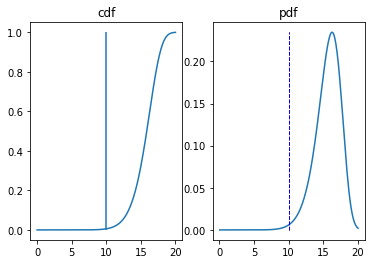

2.0618174


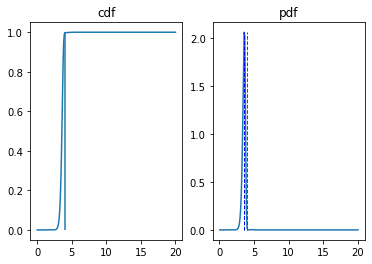

6.788218


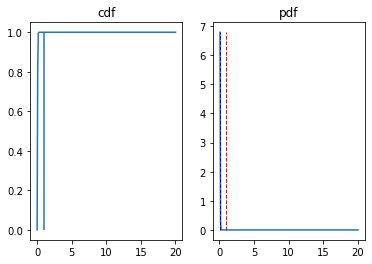

0.23261762


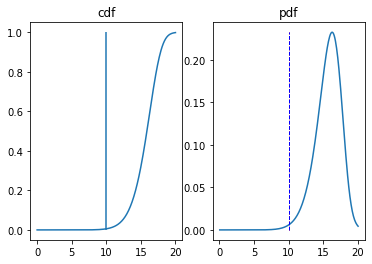

0.23481679


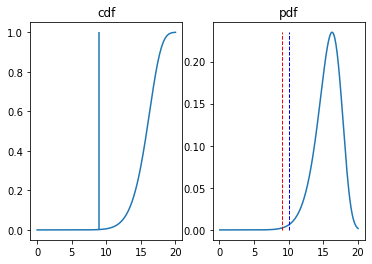

1.6363543


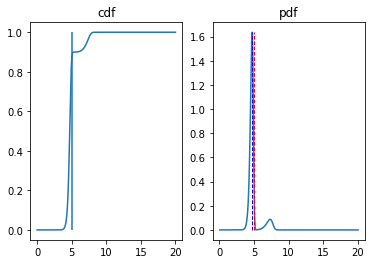

6.787956


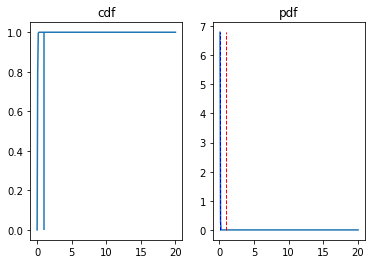

2.145391


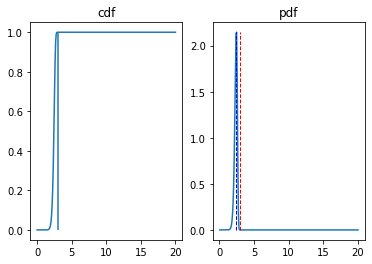

0.9038121


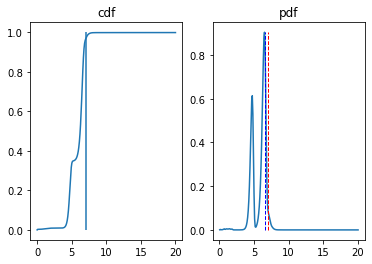

2.0427866


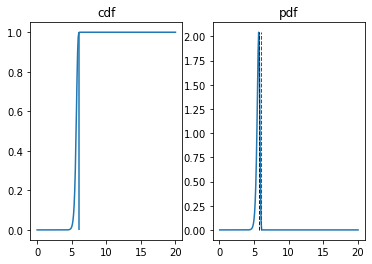

In [5]:
for i in range(20):
    plt.subplot(1, 2, 1)
    plt.plot(np.linspace(0, 20, 240), data['cdf'][i])
    plt.vlines(10-data['gt'][i],0,1)
    plt.title('cdf')
    plt.subplot(1, 2, 2)
    plt.plot(np.linspace(0, 20, 240),data['pdf'][i])
    maxval = np.max(data['pdf'][i].numpy()[1:])
    print(maxval)
    plt.vlines(10-data['gt'][i],0,maxval, color='r', linestyle='--', linewidth=1)
    plt.vlines(data['survival_time'][i],0,maxval, color='b', linestyle='--', linewidth=1)
    plt.title('pdf')
    plt.show()